In [224]:
# !pip install -U textblob
# !python -m textblob.download_corpora

#installing tweet-preprocessor
# !pip install tweet-preprocessor

# !pip install wordcloud

In [225]:
import re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import preprocessor as p

In [226]:
data = pd.read_csv("data/Corona_NLP_train.csv", encoding = 'latin1') 
display(data.head())
print(data.shape)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


(41157, 6)


In [240]:
data["TweetAt"] = pd.to_datetime(data["TweetAt"], format='%d-%m-%Y')
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Hashtags,HashtagsCount,Mentions,URLs,CleanTweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[],0,3,3,and and
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,[],0,0,0,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,[],0,0,1,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,"[COVID19france, COVID_19, COVID19, coronavirus...",7,0,1,My food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[COVID19, coronavirus, CoronavirusFrance, rest...",6,0,1,"Me, ready to go at supermarket during the outb..."
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive,[],0,1,1,As news of the regions first confirmed COVID-1...
6,3805,48757,"35.926541,-78.753267",2020-03-16,Cashier at grocery store was sharing his insig...,Positive,[Covid_19],1,0,1,Cashier at grocery store was sharing his insig...
7,3806,48758,Austria,2020-03-16,Was at the supermarket today. Didn't buy toile...,Neutral,"[Rebel, toiletpapercrisis, covid_19]",3,0,1,Was at the supermarket today. Didn't buy toile...
8,3807,48759,"Atlanta, GA USA",2020-03-16,Due to COVID-19 our retail store and classroom...,Positive,[],0,0,1,Due to COVID-19 our retail store and classroom...
9,3808,48760,"BHAVNAGAR,GUJRAT",2020-03-16,"For corona prevention,we should stop to buy th...",Negative,"[govindia, IndiaFightsCorona]",2,0,0,"For corona prevention,we should stop to buy th..."


,UserName,ScreenName,Location,OriginalTweet,Sentiment,Hashtags,HashtagsCount,Mentions,URLs,CleanTweet
TweetAt,,,,,,,,,,
2020-03-16,656,656,529,656,656,656,656,656,656,656
2020-03-17,1977,1977,1555,1977,1977,1977,1977,1977,1977,1977
2020-03-18,2742,2742,2183,2742,2742,2742,2742,2742,2742,2742
2020-03-19,3215,3215,2614,3215,3215,3215,3215,3215,3215,3215
2020-03-20,3448,3448,2618,3448,3448,3448,3448,3448,3448,3448


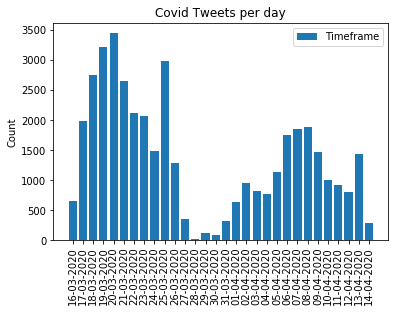

In [248]:
import matplotlib.dates as mdates

df_timeframe = data.groupby(by=["TweetAt"]).count()
df_timeframe = df_timeframe.sort_values(by=["TweetAt"])
display(df_timeframe.head())

cols = df_timeframe["OriginalTweet"].index
vals = df_timeframe["OriginalTweet"].values

fig, ax = plt.subplots()

ax.bar(cols, vals, label="Timeframe")
plt.xticks(rotation=90)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_xticks(cols)
ax.set_ylabel('Count')
ax.set_title('Covid Tweets per day')
ax.legend()

plt.show()

In [228]:
df_sentiment = data.groupby(by=["Sentiment"]).count()
df_sentiment = df_sentiment.reindex(['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
display(df_sentiment)

,UserName,ScreenName,Location,TweetAt,OriginalTweet
Sentiment,,,,,
Extremely Negative,5481,5481,4249,5481,5481
Negative,9917,9917,7763,9917,9917
Neutral,7713,7713,6172,7713,7713
Positive,11422,11422,9110,11422,11422
Extremely Positive,6624,6624,5273,6624,6624


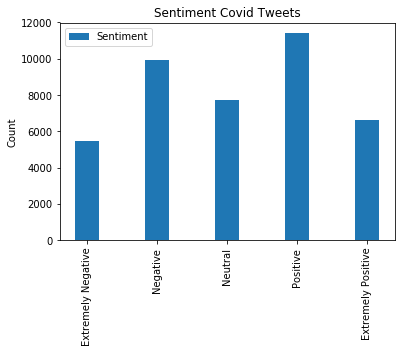

In [229]:
cols = df_sentiment["OriginalTweet"].index
vals = df_sentiment["OriginalTweet"].values

fig, ax = plt.subplots()

ax.bar(cols, vals, width=0.35, label="Sentiment")
plt.xticks(rotation=90)
ax.set_ylabel('Count')
ax.set_title('Sentiment Covid Tweets')
ax.legend()

plt.show()

In [230]:
df_location = data.groupby(by=["Location"]).count()
df_location = df_location.sort_values(by=["OriginalTweet"], ascending=False)

print("Rows with NaN location: " + str(data["Location"].isna().sum()))
display(pd.DataFrame(df_location["OriginalTweet"]).head(25))
display(pd.DataFrame(df_location["OriginalTweet"]).tail(25))

Rows with NaN location: 8590


,OriginalTweet
Location,
London,540
United States,528
"London, England",520
"New York, NY",395
"Washington, DC",373
United Kingdom,337
"Los Angeles, CA",281
India,268
UK,232


,OriginalTweet
Location,
"IBAYI, South Africa",1
IG | loueezecee,1
IG: @acluhawaii,1
IG: NATXSARAXA,1
I live where my heart guides,1
I live in a city.,1
I live in SorosÂ pool house.,1
I am a furry sorry,1
Hyderabad/Vijayawada,1


Looking at the numerical statistics based on the sentiment count, we can conclude that not all tweets have a location, therefore it is clear we will not take location into account when predicting the sentiment of tweets.

When looking at the variety of names within the location column, we can conclude that this is not a useful source. The locations consist of cities in combination with states, only city names, only country names, personalized locations or arrays of question marks or uknown character strings.

In [231]:
data["Hashtags"] = data["OriginalTweet"].apply(lambda x: re.findall(r"#(\w+)", x))
data["HashtagsCount"] = data["OriginalTweet"].apply(lambda x: len(re.findall(r"#(\w+)", x)))
data["Mentions"] = data["OriginalTweet"].apply(lambda x: len(re.findall(r"@(\w+)", x)))
data["URLs"] = data["OriginalTweet"].apply(lambda x: len(re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', x)))
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Hashtags,HashtagsCount,Mentions,URLs
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[],0,3,3
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,[],0,0,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,[],0,0,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,"[COVID19france, COVID_19, COVID19, coronavirus...",7,0,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[COVID19, coronavirus, CoronavirusFrance, rest...",6,0,1


In [232]:
data["CleanTweet"] = data["OriginalTweet"].apply(lambda x: p.clean(x))
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Hashtags,HashtagsCount,Mentions,URLs,CleanTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,[],0,3,3,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,[],0,0,0,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,[],0,0,1,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,"[COVID19france, COVID_19, COVID19, coronavirus...",7,0,1,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[COVID19, coronavirus, CoronavirusFrance, rest...",6,0,1,"Me, ready to go at supermarket during the outb..."


In [233]:
data.describe()

,UserName,ScreenName,HashtagsCount,Mentions,URLs
count,41157.000000,41157.000000,41157.000000,41157.000000,41157.000000
mean,24377.000000,69329.000000,1.971742,0.427023,0.582963
std,11881.146851,11881.146851,2.839608,1.126187,0.676264
min,3799.000000,48751.000000,0.000000,0.000000,0.000000
25%,14088.000000,59040.000000,0.000000,0.000000,0.000000
50%,24377.000000,69329.000000,1.000000,0.000000,0.000000
75%,34666.000000,79618.000000,3.000000,0.000000,1.000000
max,44955.000000,89907.000000,30.000000,21.000000,6.000000


There are 6500769 words in the combination of all tweets.


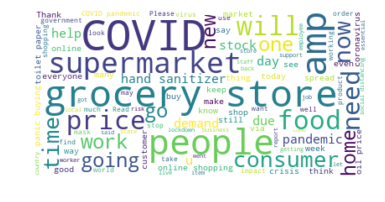

In [234]:
text = " ".join(tweet for tweet in data["CleanTweet"])
print ("There are {} words in the combination of all tweets.".format(len(text)))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud.to_file("wordcloud.png")